In [23]:
# 데이터셋 
# https://archive.ics.uci.edu/dataset/320/student+performance

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix



G1 -> 1학기 성적<br>
G2 -> 2학기 성적<br>
G3 -> 3학기 성적(최종 성적-target)<br>



데이터셋의 설명에서 <br>
This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).<br>
G1, G2를 사용해 G3를 예측하는게 효율이 좋다


In [2]:



#d1 -> 수학성적
#d2 -> 포르투칼 언어 성적
d1 = pd.read_csv("/Users/anchanghun/Downloads/AI_Study/student/dataset/student+performance/student-mat.csv", sep=";")
d2 = pd.read_csv("/Users/anchanghun/Downloads/AI_Study/student/dataset/student+performance/student-por.csv", sep=";")

common_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

d3 = pd.merge(d1, d2, on=common_columns)
print(len(d3))  # 382 학생수
print(len(d1))
print(len(d2))

382
395
649


In [3]:
d3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [4]:
d3.rename(columns={'G1_x': 'G1_m', 'G2_x': 'G2_m', 'G3_x': 'G3_m', 'G1_y': 'G1_p', 'G2_y': 'G2_p', 'G3_y': 'G3_p'}, inplace=True)


In [5]:
d3['student'] = [i + 1 for i, _ in enumerate(d3.iterrows())]

In [6]:
d3['student']

0        1
1        2
2        3
3        4
4        5
      ... 
377    378
378    379
379    380
380    381
381    382
Name: student, Length: 382, dtype: int64

In [7]:
d3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p,student
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,5


In [8]:
d3.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_p,G2_p,G3_p,student
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707,191.500000
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438,110.418145
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000,96.250000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000,191.500000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000,286.750000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,382.000000


In [9]:
d3.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian_x      0
traveltime_x    0
studytime_x     0
failures_x      0
schoolsup_x     0
famsup_x        0
paid_x          0
activities_x    0
nursery         0
higher_x        0
internet        0
romantic_x      0
famrel_x        0
freetime_x      0
goout_x         0
Dalc_x          0
Walc_x          0
health_x        0
absences_x      0
G1_m            0
G2_m            0
G3_m            0
guardian_y      0
traveltime_y    0
studytime_y     0
failures_y      0
schoolsup_y     0
famsup_y        0
paid_y          0
activities_y    0
higher_y        0
romantic_y      0
famrel_y        0
freetime_y      0
goout_y         0
Dalc_y          0
Walc_y          0
health_y        0
absences_y      0
G1_p            0
G2_p            0
G3_p            0
student         0
dtype: int64

In [10]:
df_encoded = pd.get_dummies(d3)
df_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime_x', 'studytime_x', 'failures_x',
       'famrel_x', 'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x',
       'absences_x', 'G1_m', 'G2_m', 'G3_m', 'traveltime_y', 'studytime_y',
       'failures_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y',
       'health_y', 'absences_y', 'G1_p', 'G2_p', 'G3_p', 'student',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_x_father', 'guardian_x_mother',
       'guardian_x_other', 'schoolsup_x_no', 'schoolsup_x_yes', 'famsup_x_no',
       'famsup_x_yes', 'paid_x_no', 'paid_x_yes', 'activities_x_no',
       'activities_x_yes', 'nursery_no', 'nu

Text(0.5, 1.0, 'count')

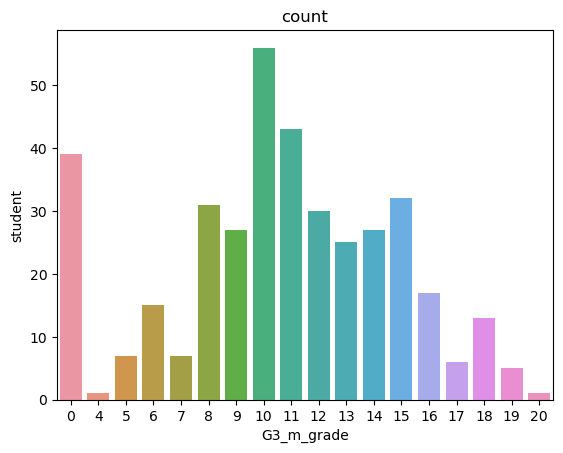

In [11]:
sns.countplot(data = df_encoded, x="G3_m")
plt.xlabel("G3_m_grade")
plt.ylabel("student")
plt.title("count")

Text(0.5, 1.0, 'count')

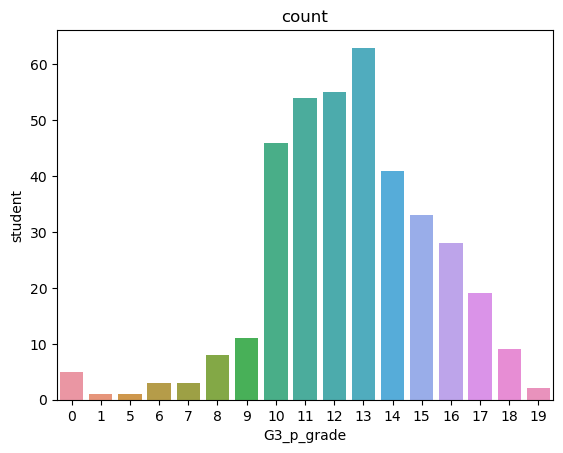

In [12]:
sns.countplot(data = df_encoded, x="G3_p")
plt.xlabel("G3_p_grade")
plt.ylabel("student")
plt.title("count")

In [13]:
df_encoded.corr()["G3_m"].sort_values(ascending=True)

failures_x    -0.380741
higher_x_no   -0.232177
higher_y_no   -0.216342
age           -0.194589
absences_y    -0.158033
                 ...   
G1_p           0.495305
G2_p           0.535552
G1_m           0.805129
G2_m           0.903027
G3_m           1.000000
Name: G3_m, Length: 88, dtype: float64

In [14]:
df_encoded.corr()["G3_p"].sort_values(ascending=True)

failures_x    -0.383864
failures_y    -0.343499
higher_y_no   -0.311975
higher_x_no   -0.303576
Dalc_y        -0.275340
                 ...   
G2_m           0.507500
G1_m           0.550844
G1_p           0.819048
G2_p           0.892444
G3_p           1.000000
Name: G3_p, Length: 88, dtype: float64

In [15]:
d1['sex'] = d1['sex'].replace({'F': 1, 'M': 0})
d1['schoolsup'] = d1['schoolsup'].replace({'yes': 1, 'no': 0})
d1['famsup'] = d1['famsup'].replace({'yes': 1, 'no': 0})
d1['nursery'] = d1['nursery'].replace({'yes': 1, 'no': 0})
d1['activities'] = d1['activities'].replace({'yes': 1, 'no': 0})
d1['higher'] = d1['higher'].replace({'yes': 1, 'no': 0})
d1['internet'] = d1['internet'].replace({'yes': 1, 'no': 0})
d1['romantic'] = d1['romantic'].replace({'yes': 1, 'no': 0})
d1['paid'] = d1['paid'].replace({'yes': 1, 'no': 0})


d1['Mjob'] = d1['Mjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})
d1['Fjob'] = d1['Fjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})


d1['Pstatus'] = d1['Pstatus'].replace({'T': 1, 'A': 0})


In [16]:
d1_encoded = pd.get_dummies(d1)
d2_encoded = pd.get_dummies(d2)

In [17]:
d1_encoded.columns

Index(['sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'school_GP', 'school_MS', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other'],
      dtype='object')

In [18]:
d1_encoded.corr()["G3"].sort_values(ascending=True)

failures            -0.360415
age                 -0.161579
goout               -0.132791
romantic            -0.129970
traveltime          -0.117142
address_R           -0.105756
sex                 -0.103456
reason_course       -0.098950
guardian_other      -0.087774
schoolsup           -0.082788
famsize_GT3         -0.081407
Fjob                -0.069639
health              -0.061335
Pstatus             -0.058009
Dalc                -0.054660
Walc                -0.051939
school_MS           -0.045017
famsup              -0.039157
reason_home         -0.021359
Mjob                 0.002725
freetime             0.011307
activities           0.016100
guardian_mother      0.022338
guardian_father      0.032493
absences             0.034247
school_GP            0.045017
famrel               0.051363
nursery              0.051568
reason_other         0.052008
famsize_LE3          0.081407
reason_reputation    0.095692
studytime            0.097820
internet             0.098483
paid      

In [19]:
d1_encoded =d1_encoded.drop('age',axis=1)
d1_encoded =d1_encoded.drop('failures',axis=1)
d1_encoded =d1_encoded.drop('goout',axis=1)
d1_encoded =d1_encoded.drop('romantic',axis=1)


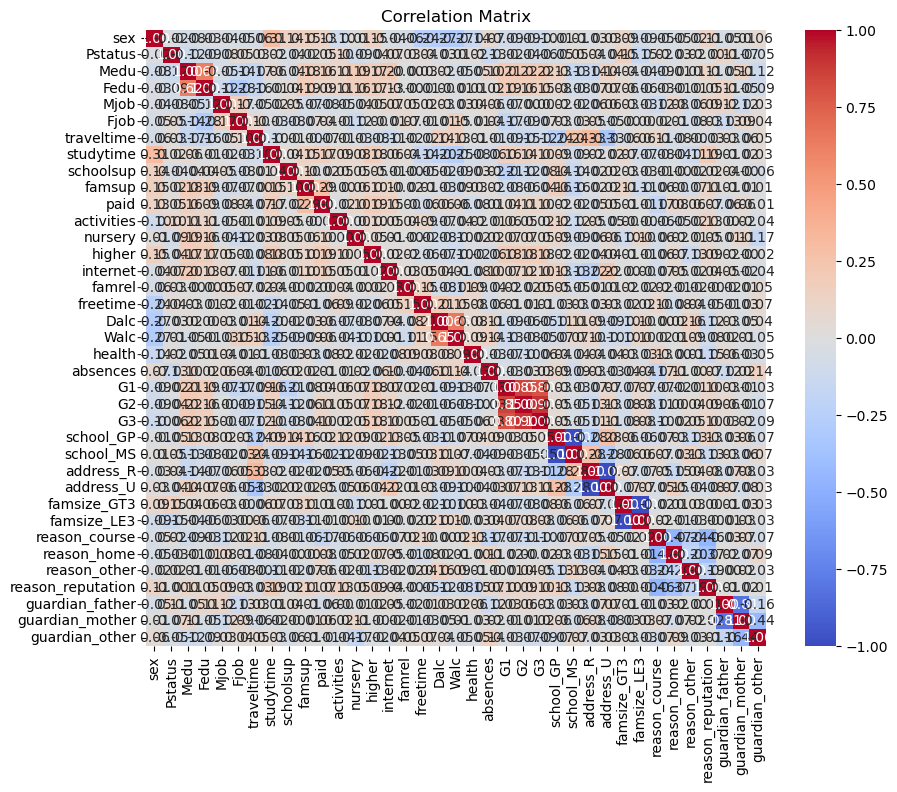

In [20]:
correlation_matrix = d1_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [21]:
def classification_model(X_train, y_train, X_test, y_test):
    # SVM
    svm_classifier = SVC()
    svm_classifier.fit(X_train, y_train)
    svm_pred_class = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_pred_class)
    print("\n--- SVM Classifier ---")
    print(f"Accuracy: {svm_accuracy:.4f}")
    print(confusion_matrix(y_test, svm_pred_class))
    print(classification_report(y_test, svm_pred_class, zero_division=1))

    # Logistic Regression
    lr_classifier = LogisticRegression(max_iter=1000, solver='liblinear')
    lr_classifier.fit(X_train, y_train)
    lr_pred_class = lr_classifier.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred_class)
    print("\n--- Logistic Regression Classifier ---")
    print(f"Accuracy: {lr_accuracy:.4f}")
    print(confusion_matrix(y_test, lr_pred_class))
    print(classification_report(y_test, lr_pred_class, zero_division=1))

    # Decision Tree
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    dt_pred_class = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_pred_class)
    print("\n--- Decision Tree Classifier ---")
    print(f"Accuracy: {dt_accuracy:.4f}")
    print(confusion_matrix(y_test, dt_pred_class))
    print(classification_report(y_test, dt_pred_class, zero_division=1))

    # Random Forest
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    rf_pred_class = rf_classifier.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred_class)
    print("\n--- Random Forest Classifier ---")
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(confusion_matrix(y_test, rf_pred_class))
    print(classification_report(y_test, rf_pred_class, zero_division=1))

    # K-Nearest Neighbors
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)
    knn_pred_class = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_pred_class)
    print("\n--- K-Nearest Neighbors Classifier ---")
    print(f"Accuracy: {knn_accuracy:.4f}")
    print(confusion_matrix(y_test, knn_pred_class))
    print(classification_report(y_test, knn_pred_class, zero_division=1))
    
def regression_model(X_train, y_train, X_test, y_test):
    # Decision Tree Regression
    dt_regressor = DecisionTreeRegressor()
    dt_regressor.fit(X_train, y_train)
    dt_pred_reg = dt_regressor.predict(X_test)
    dt_mse = mean_squared_error(y_test, dt_pred_reg)
    print("\n--- Decision Tree Regressor ---")
    print(f"Mean Squared Error: {dt_mse:.4f}")

    # Random Forest Regression
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    rf_pred_reg = rf_regressor.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred_reg)
    print("\n--- Random Forest Regressor ---")
    print(f"Mean Squared Error: {rf_mse:.4f}")

    # K-Nearest Neighbors Regression
    knn_regressor = KNeighborsRegressor()
    knn_regressor.fit(X_train, y_train)
    knn_pred_reg = knn_regressor.predict(X_test)
    knn_mse = mean_squared_error(y_test, knn_pred_reg)
    print("\n--- K-Nearest Neighbors Regressor ---")
    print(f"Mean Squared Error: {knn_mse:.4f}")

In [24]:
# 데이터 전처리
X = d1_encoded.drop("G3", axis=1)  # 특성
y_classification = d1_encoded["G3"]  # 분류 레이블
y_regression = d1_encoded["G3"]  # 회귀 레이블

# 특성 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

classification_model(X_train_class,  y_train_class, X_test_class, y_test_class)
regression_model(X_train_reg, y_train_reg, X_test_reg, y_test_reg)


--- SVM Classifier ---
Accuracy: 0.1646
[[2 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 3 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 8 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 1 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 1 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           5       1.00      0.00      0.00         4
           6       1.00      0.00      0.00         6
           7       1.00      0.00      0.00         1
           8       0.00      0.00      1.00         6
           9       1.00      0.00      0.00         5
          10       


--- Random Forest Regressor ---
Mean Squared Error: 4.2111

--- K-Nearest Neighbors Regressor ---
Mean Squared Error: 13.8937
